# Pythia Minbias Event Generation

### Pythia try

In [1]:
import sys
cfg = open("/home/arif/hep_tools/pythia8235/examples/Makefile.inc")
lib = "/home/arif/hep_tools/pythia8235/lib"
for line in cfg:
    if line.startswith("PREFIX_LIB="): lib = line[11:-1]; break
sys.path.insert(0, lib)

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pythia8
import numpy as np

In [4]:
pythia = pythia8.Pythia()

In [4]:
pythia.readString("Beams:eCM = 8000.")
pythia.readString("HardQCD:all = on")
pythia.readString("PhaseSpace:pTHatMin = 20.")

True

In [5]:
pythia.init()

True

In [6]:
mult = pythia8.Hist("charged multiplicity", 100, -0.5, 799.5)

In [15]:
charged = []
for iEvent in range(0, 1000):
    if not pythia.next(): continue
    # Find number of all final charged particles and fill histogram.
    nCharged = 0
    for prt in pythia.event:
        if prt.isFinal() and prt.isCharged(): nCharged += 1
    mult.fill(nCharged)
    charged.append(nCharged)

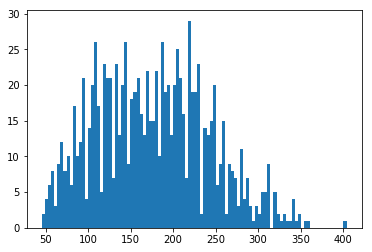

In [16]:
plt.hist(charged,100)
plt.show()

In [17]:
pythia.stat();
print(mult)



  2018-10-04 18:10       charged multiplicity

        4.80*10^ 1               5           5  5                                                                       
        4.60*10^ 1               X  X       5X  X                                                                       
        4.40*10^ 1               X  X X5   5XX  X                                                                       
        4.20*10^ 1               X  X XX   XXX XX                                                                       
        4.00*10^ 1               X  X XX   XXX XX                                                                       
        3.80*10^ 1               X XX XX X5XXXXXX                                                                       
        3.60*10^ 1               XXXX XXXXXXXXXXX                                                                       
        3.40*10^ 1               XXXX5XXXXXXXXXXX                                                       

### Minbias Events

In [4]:
pythia = pythia8.Pythia()

In [5]:
pythia.readString("Main:numberOfEvents = 100")
pythia.readString("Beams:eCM = 13000.")
pythia.readString("Beams:eA = 6500.")
pythia.readString("Beams:eB = 6500.")
pythia.readString("Beams:pzA = 6500.")
pythia.readString("Beams:pzB = -6500.")
pythia.readString("SoftQCD:all = on")
pythia.readString("SoftQCD:nonDiffractive = on")
pythia.readString("SoftQCD:elastic = on")
pythia.readString("SoftQCD:singleDiffractive = on")
pythia.readString("SoftQCD:doubleDiffractive = on")
pythia.readString("SoftQCD:centralDiffractive = on")
pythia.readString("SoftQCD:inelastic = on")

True

In [34]:
pythia.init()

True

In [13]:
mult = pythia8.Hist("charged multiplicity", 100, -0.5, 799.5)

In [33]:
charged = []
pT = []
hist_pT = []

for iEvent in range(0, 100):
    event_pT = []
    if not pythia.next(): continue
    # Find number of all final charged particles and fill histogram.
    nCharged = 0
    for prt in pythia.event:
        if(prt.isFinal() and prt.isCharged()): 
            nCharged += 1
            pT.append(prt.pT())
            event_pT.append(prt.pT())
    hist_pT.append(np.max(event_pT))
    mult.fill(nCharged)
    charged.append(nCharged)
        

In [41]:
charged = []
pT = []
hist_pT = []

for iEvent in range(0, 10000):
    event_pT = []
    if not pythia.next(): continue
    # Find number of all final charged particles and fill histogram.
    nCharged = 0
    for prt in pythia.event:
        if(prt.isFinal()): 
            nCharged += 1
            pT.append(prt.pT())
            event_pT.append(prt.pT())
    hist_pT.append(np.max(event_pT))
    #mult.fill(nCharged)
    charged.append(nCharged)
        

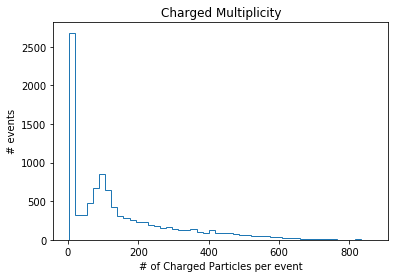

In [42]:
plt.hist(charged,50, histtype='step')
plt.title("Charged Multiplicity")
plt.xlabel("# of Charged Particles per event")
plt.ylabel("# events")
plt.show()

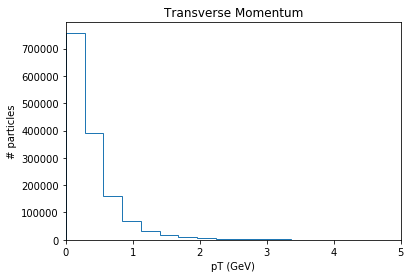

In [44]:
plt.hist(pT,100, facecolor='b', histtype='step')
plt.title("Transverse Momentum")
plt.xlabel("pT (GeV)")
plt.ylabel("# particles")
plt.xlim(0,5)
plt.show()

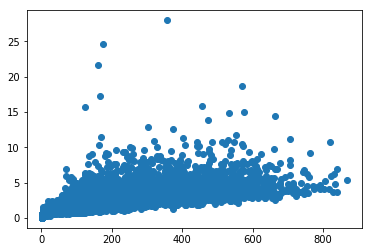

In [57]:
plt.scatter(charged, hist_pT)
plt.show()

In [50]:
%matplotlib inline

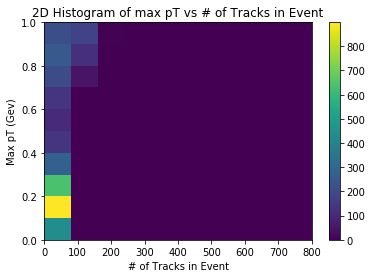

In [54]:
values = plt.hist2d(charged, hist_pT, bins=(10, 10), range= ((0,800),(0,1)),cmap='viridis')
plt.colorbar()
plt.title("2D Histogram of max pT vs # of Tracks in Event")
plt.xlabel("# of Tracks in Event")
plt.ylabel("Max pT (Gev)")
#plt.xlim(0,5)
plt.show()

In [46]:
values[0]

array([[4.427e+03, 2.600e+01, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [2.205e+03, 2.740e+02, 1.800e+01, 3.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00],
       [6.930e+02, 3.380e+02, 3.500e+01, 1.100e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00],
       [2.780e+02, 3.740e+02, 4.200e+01, 7.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.350e+02, 3.560e+02, 5.500e+01, 3.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00],
       [3.900e+01, 2.540e+02, 4.800e+01, 1.000e+01, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+01, 1.540e+02, 3.600e+01, 8.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [2.000e+00, 7.000e+01, 2.000e+01, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+

## Write to a file

In [17]:
pythia.init()
charged = []
pT = []
hist_pT = []
out_filename = "output_events.txt"
with open(out_filename, 'w') as out_file:
    for iEvent in range(0, 100):
        event_pT = []
        if not pythia.next(): continue
        # Find number of all final charged particles and fill histogram.
        nCharged = 0
        for prt in pythia.event:
            if(prt.isFinal() and prt.isCharged()): 
                nCharged += 1
                pT.append(prt.pT())
                event_pT.append(prt.pT())
                event_parameters = [prt.id(), prt.px(), prt.py(), prt.pz(), prt.e(), 
                                    prt.eta()]
                out_file.write(str(event_parameters)+'\n')
        out_file.write('\n')
        hist_pT.append(np.max(event_pT))
        charged.append(nCharged)
        

## Read from LHEF File

In [ ]:
#NEED TO WORK ON IT!
#pythia.readString("Beams:frameType = 4")
#pythia.readString("Beams:LHEF = minbias.lhe")